### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 274_data.csv')

[]

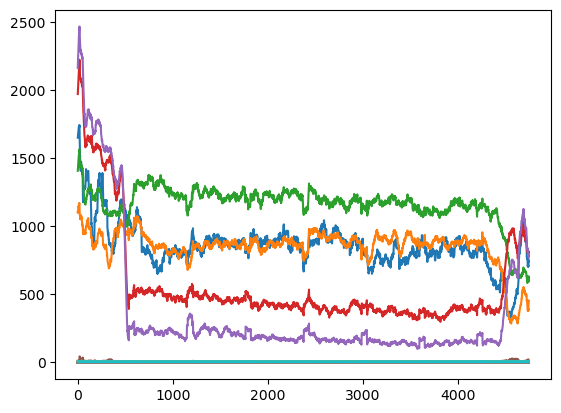

In [7]:
p=patient.drop('BIS', axis=1)
plt.plot(p)
plt.plot()

[]

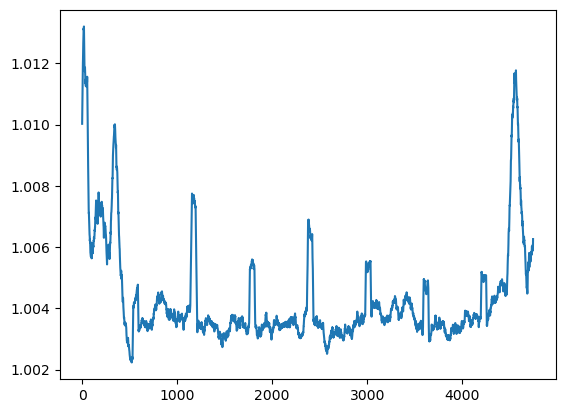

In [11]:
plt.plot(patient['pet_mode0'])
plt.plot()

In [8]:
p

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode0,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4
0,0.029908,0.274010,0.720733,1.267446,1.477822,12.224105,1.337206,1.094841,1.014237,1.008601,...,0.795544,1.904925,1.524768,1.983173,2.034866,0.743607,1.697551,2.073571,2.028452,1.961109
1,0.029936,0.274087,0.721369,1.267369,1.477721,12.414746,1.344847,1.096446,1.014363,1.008922,...,0.782654,1.904725,1.520340,1.980877,2.032943,0.738884,1.697047,2.072829,2.028978,1.960584
2,0.029941,0.274152,0.722517,1.266764,1.479423,12.539072,1.349695,1.096631,1.014385,1.008633,...,0.788117,1.904348,1.514648,1.981744,2.032382,0.736434,1.696186,2.073436,2.029055,1.960900
3,0.029944,0.274198,0.723007,1.266528,1.479743,12.662930,1.354456,1.097572,1.014541,1.008614,...,0.785379,1.901804,1.520980,1.980376,2.031570,0.731786,1.693374,2.073166,2.029130,1.962267
4,0.029953,0.274253,0.723146,1.266509,1.479808,12.755543,1.357913,1.097863,1.014273,1.008593,...,0.777380,1.903090,1.525056,1.980868,2.029256,0.727293,1.695453,2.073065,2.028362,1.962970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,0.027146,0.299869,0.754370,1.259484,1.464720,21.114867,2.220190,1.075066,1.011625,1.008716,...,0.950178,1.904710,1.567373,2.012130,2.045971,0.859244,1.666065,2.071504,2.029901,1.961485
4741,0.026946,0.297748,0.754199,1.258402,1.464818,21.283570,2.322259,1.075330,1.011625,1.008517,...,0.954109,1.905630,1.565788,2.011766,2.048686,0.857002,1.671169,2.072549,2.031812,1.959770
4742,0.027118,0.296537,0.751916,1.257516,1.465052,21.960911,2.373948,1.083173,1.011996,1.009286,...,0.949563,1.908609,1.583109,2.016030,2.049167,0.858344,1.662239,2.071266,2.031250,1.958053
4743,0.074415,0.269804,0.751268,1.267404,1.451640,2.519646,1.157279,1.027100,1.006552,1.011550,...,0.998545,1.905650,1.609494,2.017835,2.048567,0.886191,1.657004,2.071726,2.031443,1.958953


In [3]:
patient

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
0,0.029908,0.274010,0.720733,1.267446,1.477822,12.224105,1.337206,1.094841,1.014237,1.008601,...,1.904925,1.524768,1.983173,2.034866,0.743607,1.697551,2.073571,2.028452,1.961109,90.0
1,0.029936,0.274087,0.721369,1.267369,1.477721,12.414746,1.344847,1.096446,1.014363,1.008922,...,1.904725,1.520340,1.980877,2.032943,0.738884,1.697047,2.072829,2.028978,1.960584,87.8
2,0.029941,0.274152,0.722517,1.266764,1.479423,12.539072,1.349695,1.096631,1.014385,1.008633,...,1.904348,1.514648,1.981744,2.032382,0.736434,1.696186,2.073436,2.029055,1.960900,88.1
3,0.029944,0.274198,0.723007,1.266528,1.479743,12.662930,1.354456,1.097572,1.014541,1.008614,...,1.901804,1.520980,1.980376,2.031570,0.731786,1.693374,2.073166,2.029130,1.962267,89.5
4,0.029953,0.274253,0.723146,1.266509,1.479808,12.755543,1.357913,1.097863,1.014273,1.008593,...,1.903090,1.525056,1.980868,2.029256,0.727293,1.695453,2.073065,2.028362,1.962970,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,0.027146,0.299869,0.754370,1.259484,1.464720,21.114867,2.220190,1.075066,1.011625,1.008716,...,1.904710,1.567373,2.012130,2.045971,0.859244,1.666065,2.071504,2.029901,1.961485,87.9
4741,0.026946,0.297748,0.754199,1.258402,1.464818,21.283570,2.322259,1.075330,1.011625,1.008517,...,1.905630,1.565788,2.011766,2.048686,0.857002,1.671169,2.072549,2.031812,1.959770,88.0
4742,0.027118,0.296537,0.751916,1.257516,1.465052,21.960911,2.373948,1.083173,1.011996,1.009286,...,1.908609,1.583109,2.016030,2.049167,0.858344,1.662239,2.071266,2.031250,1.958053,87.6
4743,0.074415,0.269804,0.751268,1.267404,1.451640,2.519646,1.157279,1.027100,1.006552,1.011550,...,1.905650,1.609494,2.017835,2.048567,0.886191,1.657004,2.071726,2.031443,1.958953,87.6


In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,...,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000
mean,0.035605,0.318152,0.674834,1.221577,1.446269,8.343818,1.269274,1.048004,1.015652,1.010065,...,1.920085,1.685225,2.037946,2.060106,0.904546,1.725113,2.061297,2.029634,1.957297,55.792223
std,0.011945,0.018586,0.036223,0.019343,0.011919,3.742666,0.229145,0.009979,0.003790,0.003736,...,0.015428,0.068480,0.018883,0.016644,0.037069,0.030067,0.005696,0.001638,0.004074,15.535546
min,0.017297,0.244557,0.635659,1.198366,1.415615,2.515006,1.078703,1.005046,0.958462,0.906508,...,1.833125,1.471574,1.963084,1.987496,0.723646,1.568625,2.050549,2.023857,1.943558,33.400000
25%,0.029032,0.319008,0.650791,1.208561,1.438446,6.806981,1.173174,1.044031,1.013835,1.008325,...,1.911990,1.676029,2.038829,2.058143,0.883048,1.722066,2.057627,2.028546,1.954267,45.700000
50%,0.031423,0.323107,0.657932,1.212765,1.441189,7.510007,1.184512,1.046597,1.016983,1.011083,...,1.920181,1.709358,2.044441,2.065121,0.901275,1.732644,2.059673,2.029681,1.957051,51.400000
75%,0.035992,0.327299,0.702428,1.237299,1.449162,8.150000,1.214873,1.049770,1.018089,1.011835,...,1.929835,1.728387,2.048479,2.070219,0.922721,1.741248,2.062991,2.030795,1.960461,58.200000
max,0.081458,0.351211,0.776040,1.327969,1.483415,44.065375,2.837284,1.137584,1.034173,1.014819,...,1.960502,1.780812,2.059210,2.079266,1.050832,1.777767,2.074609,2.035114,1.969162,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

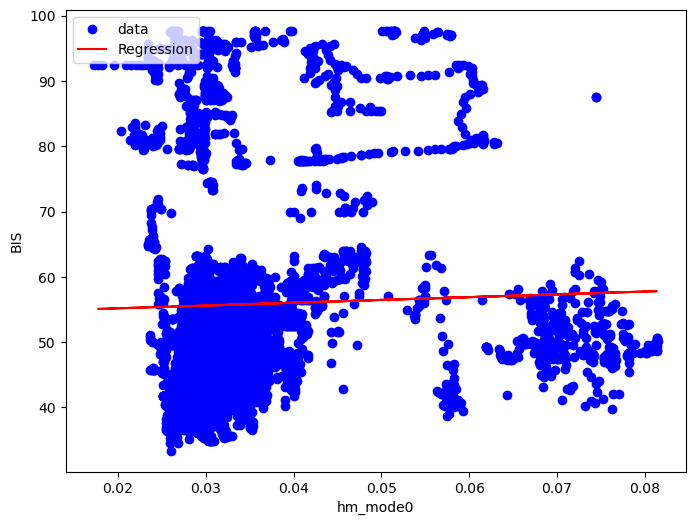

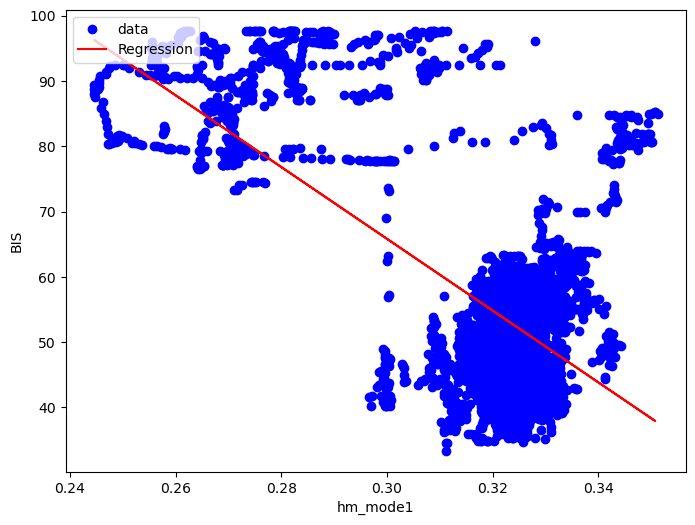

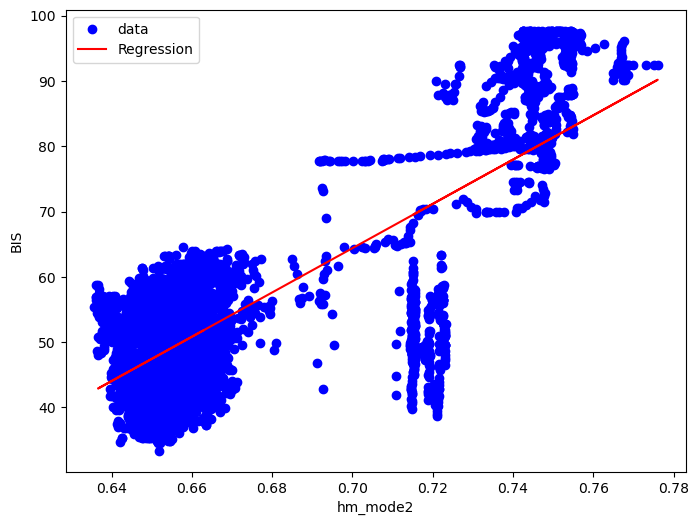

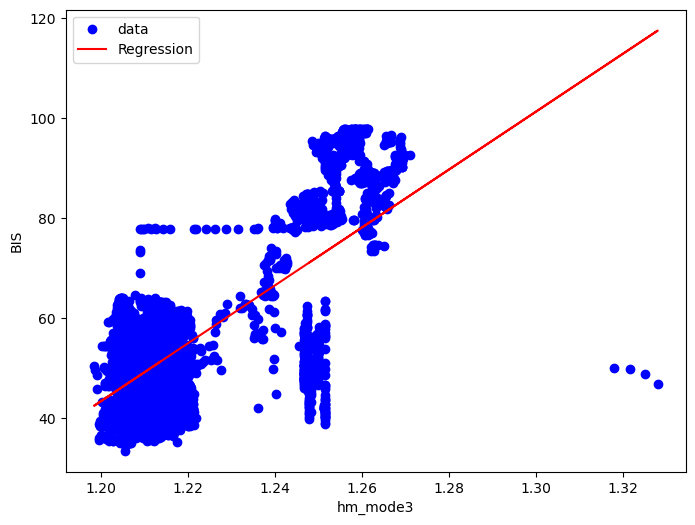

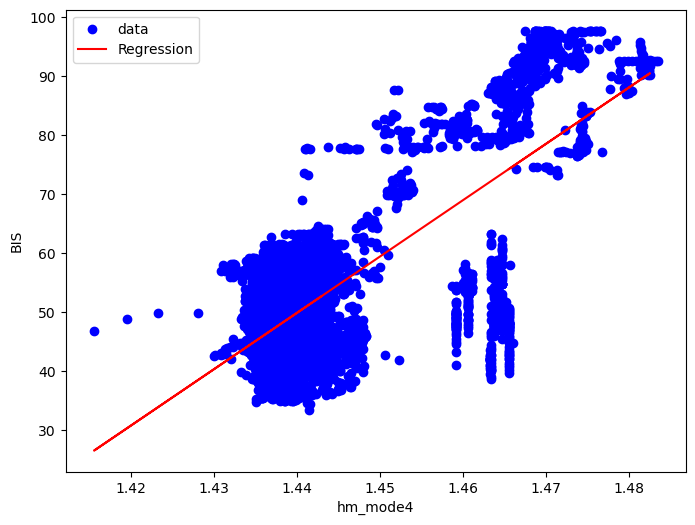

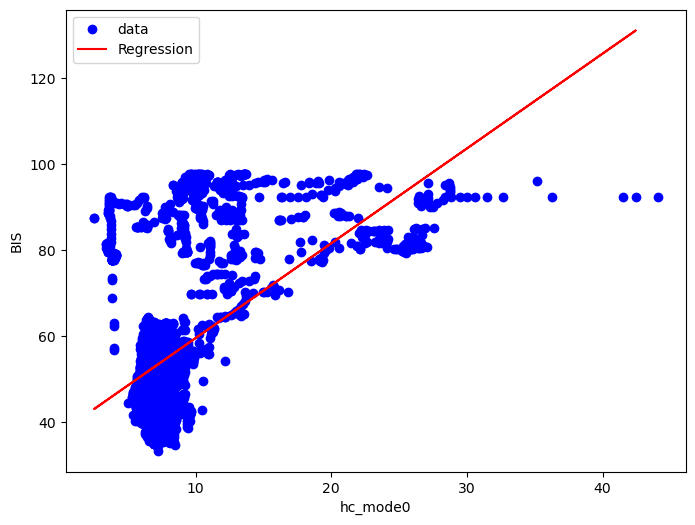

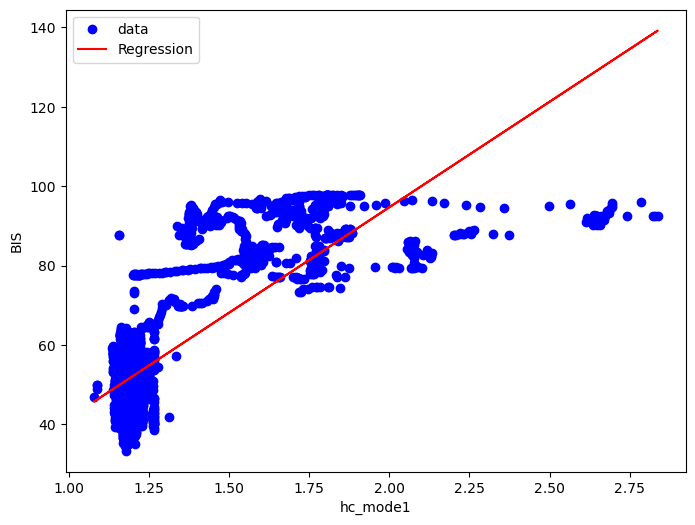

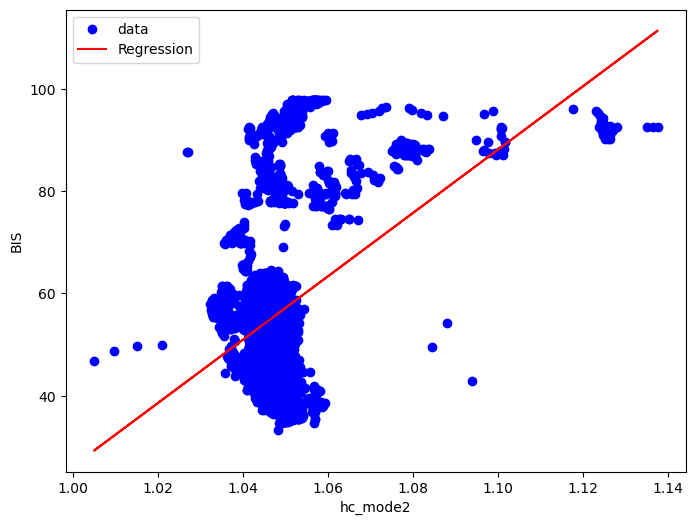

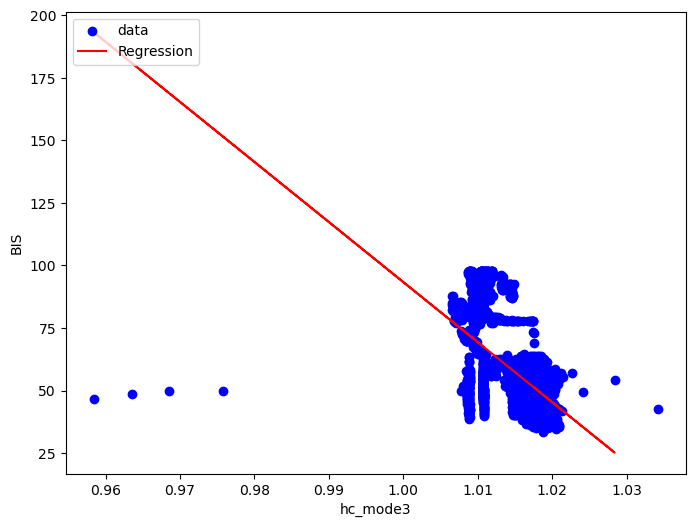

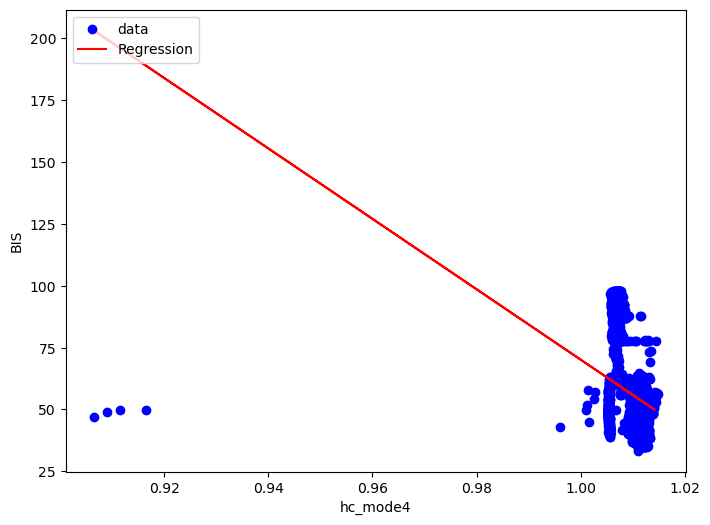

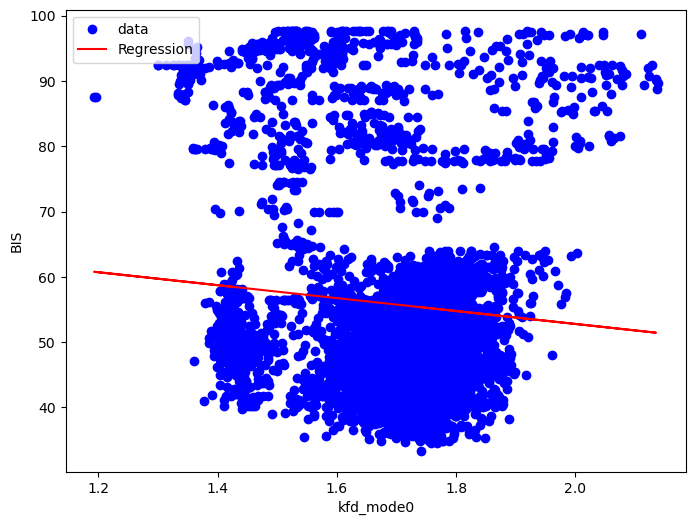

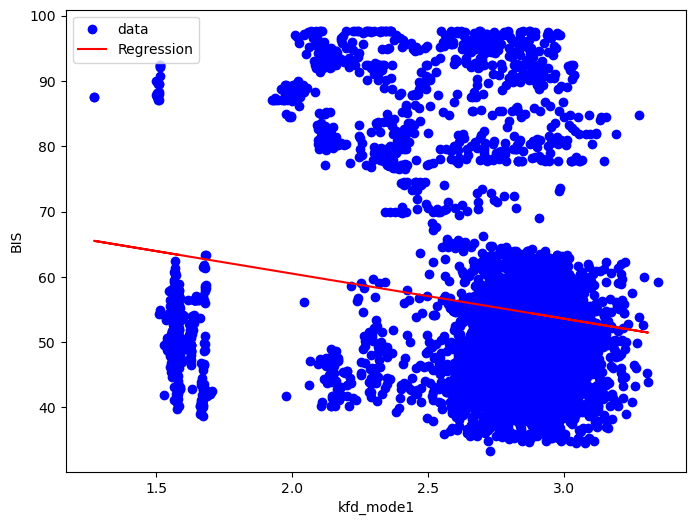

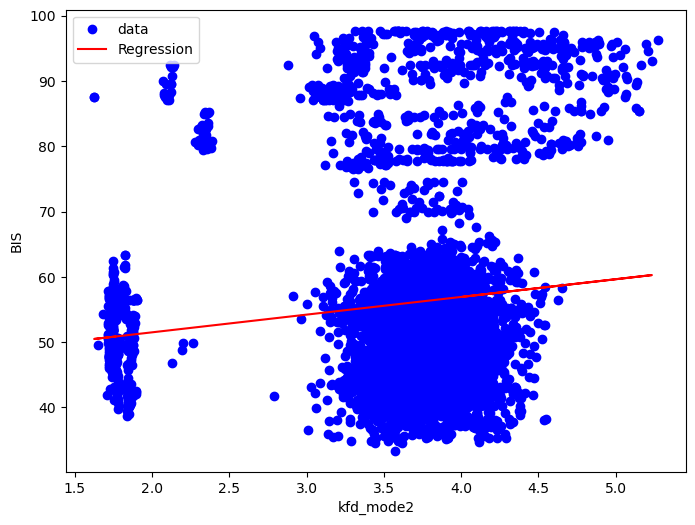

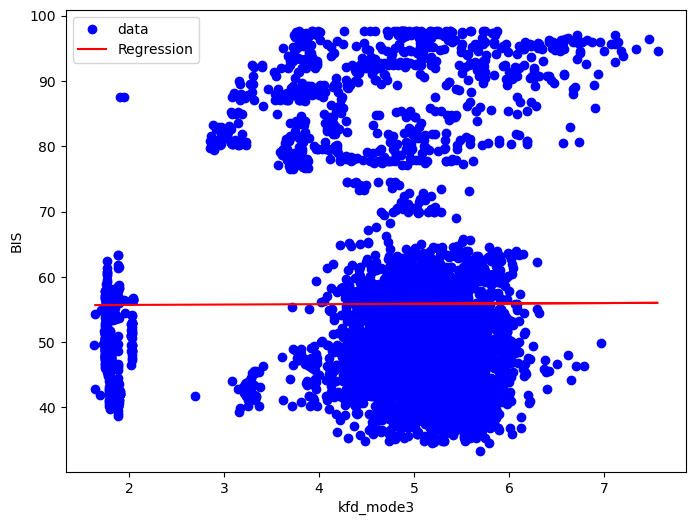

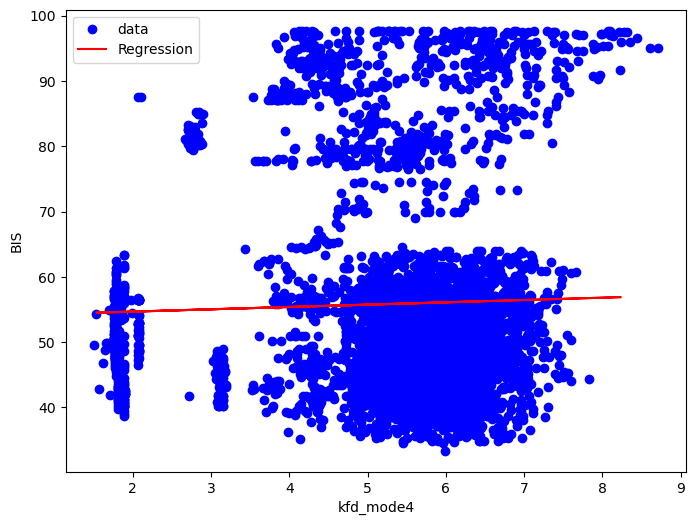

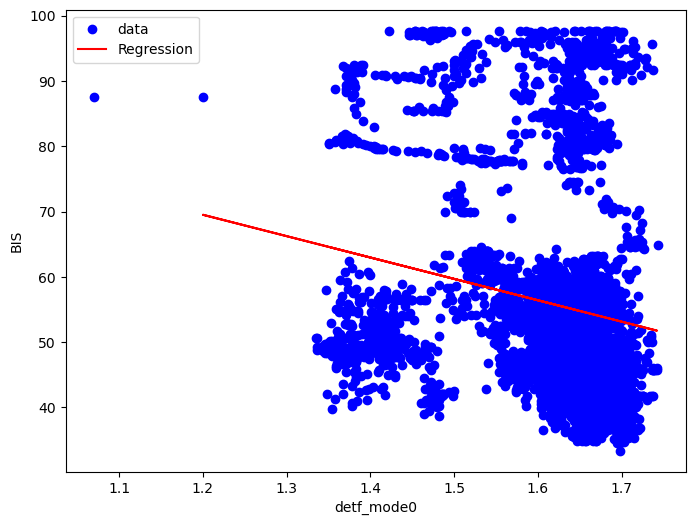

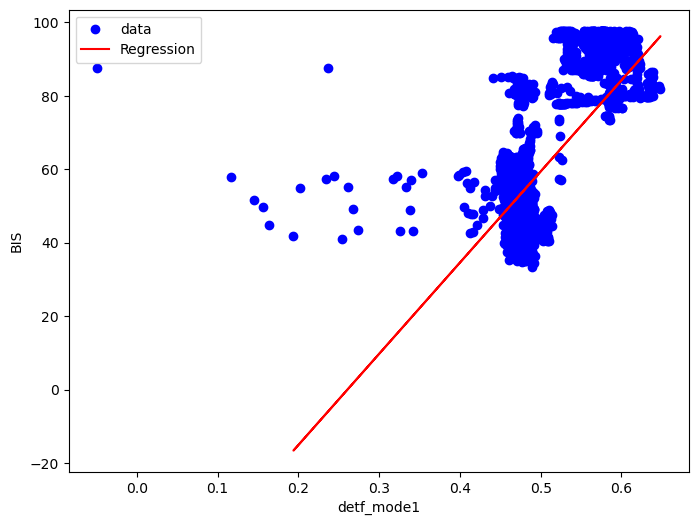

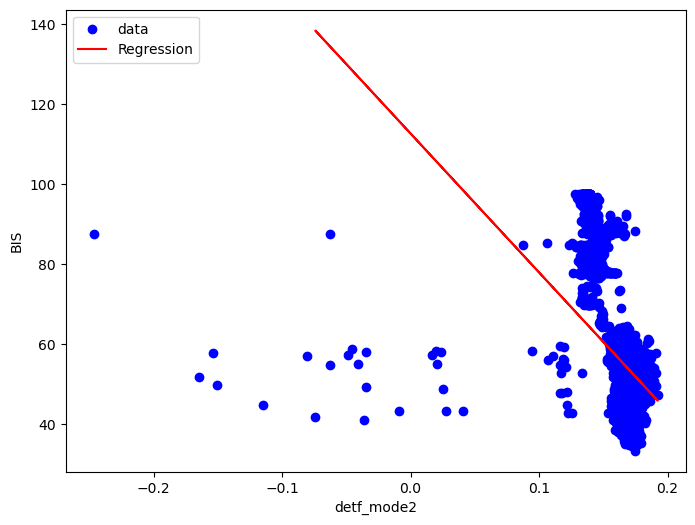

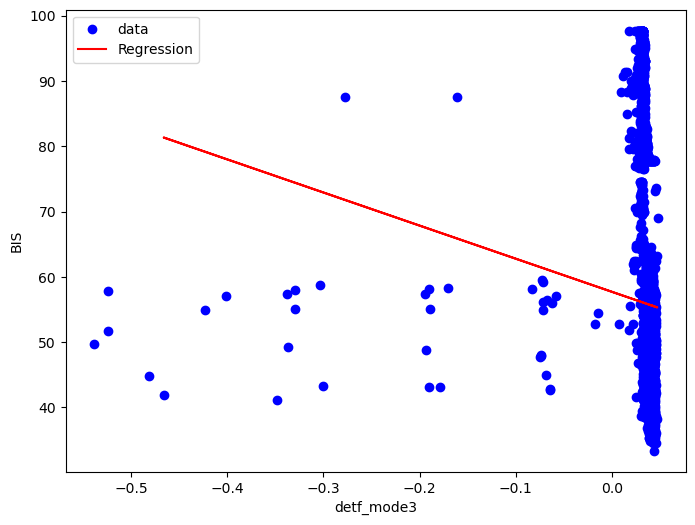

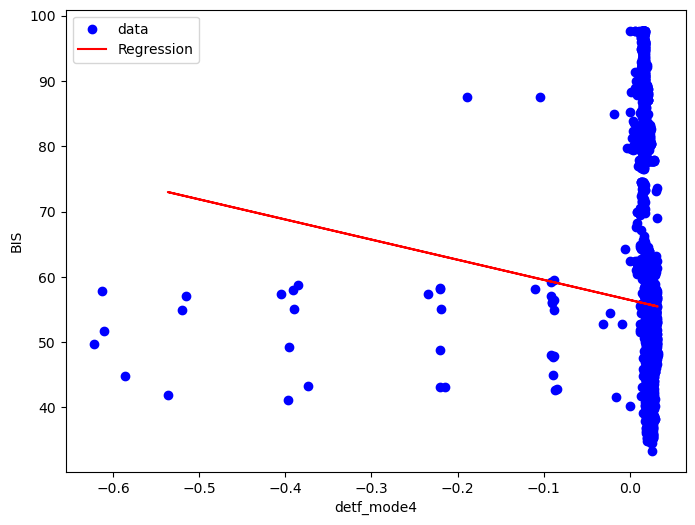

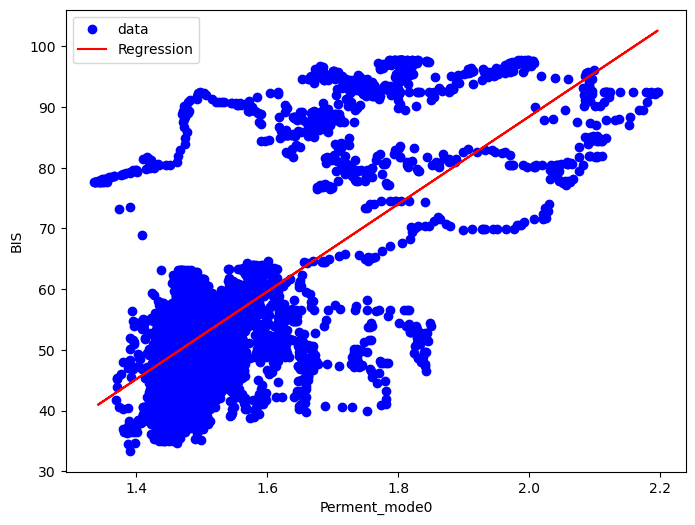

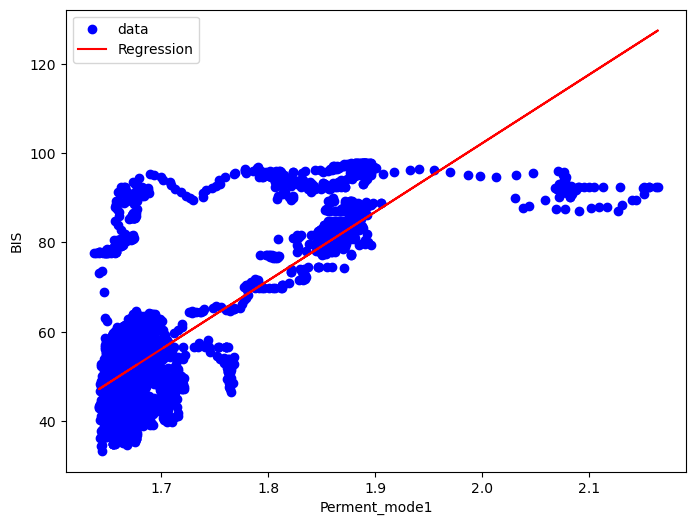

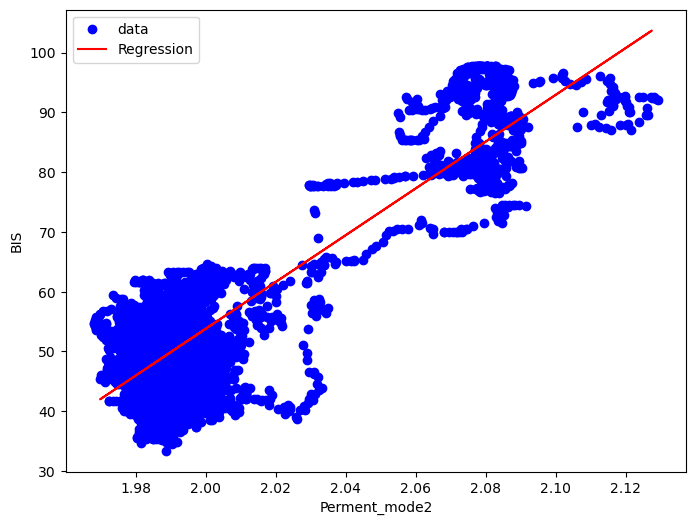

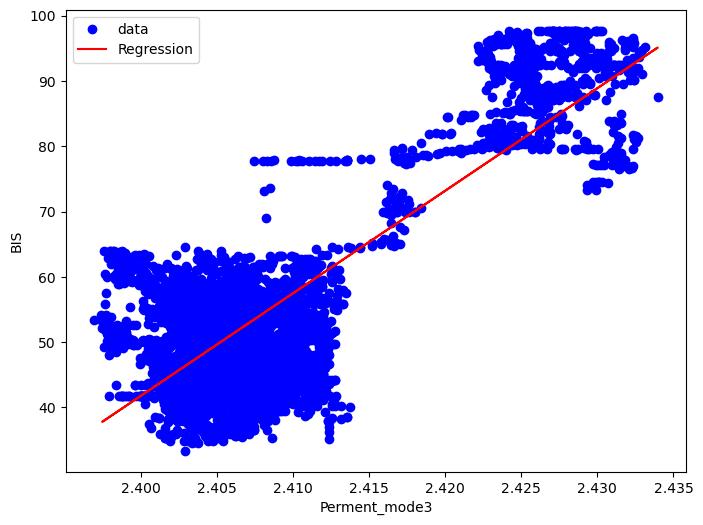

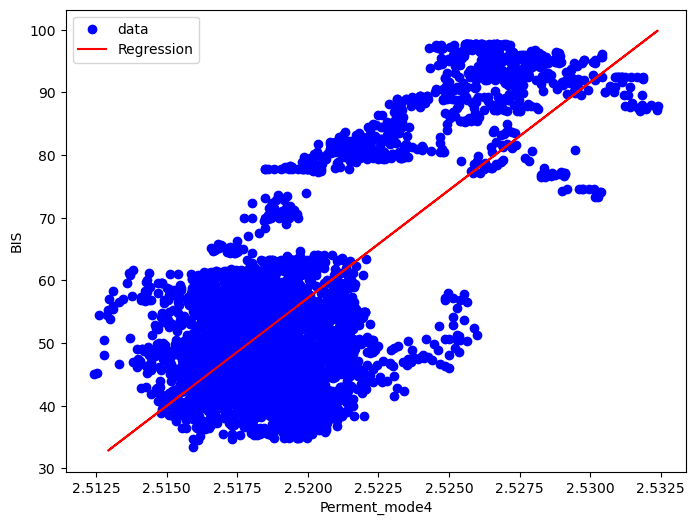

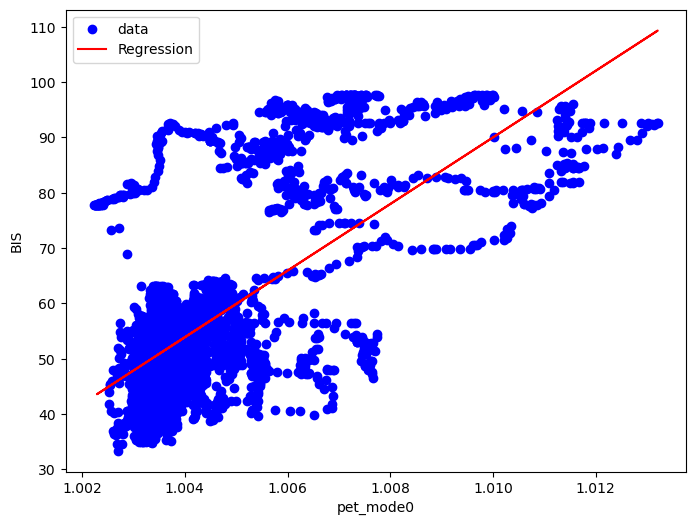

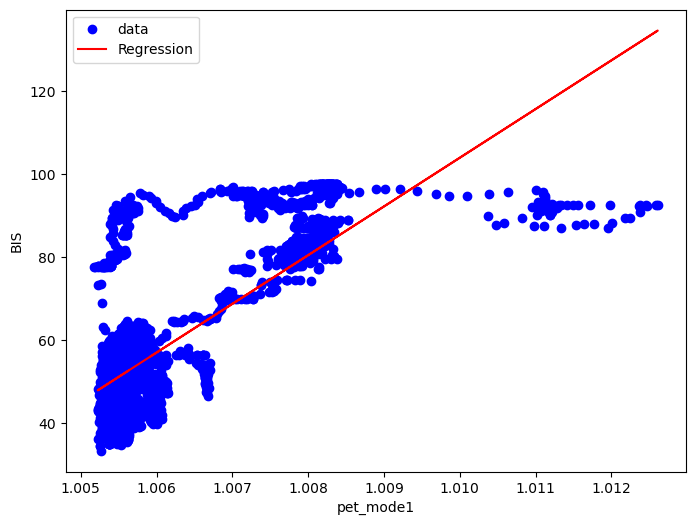

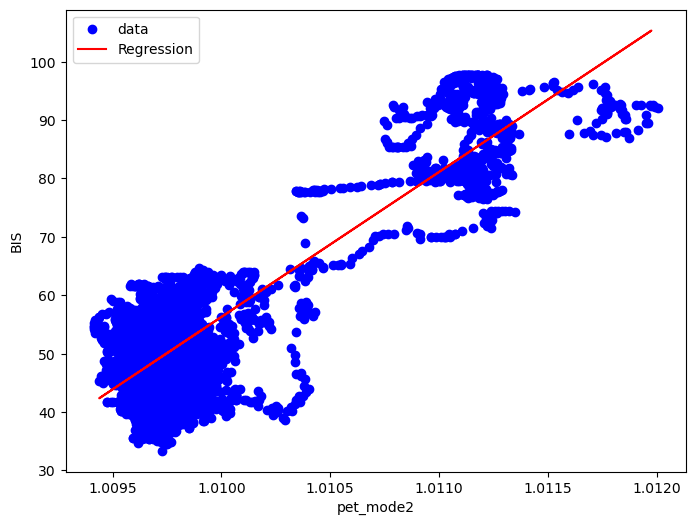

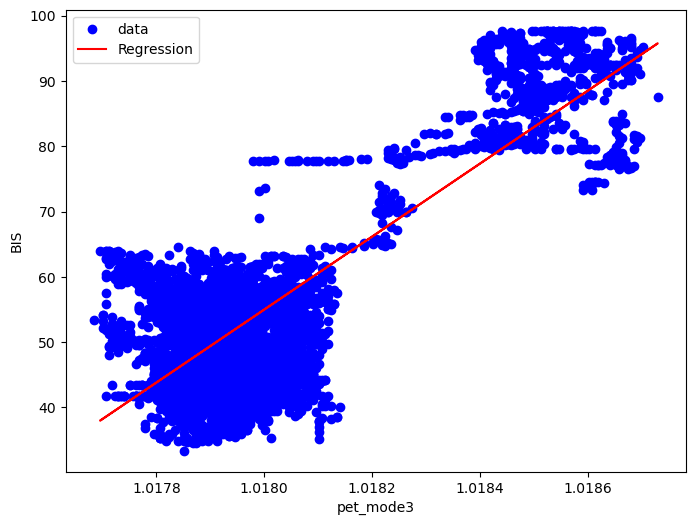

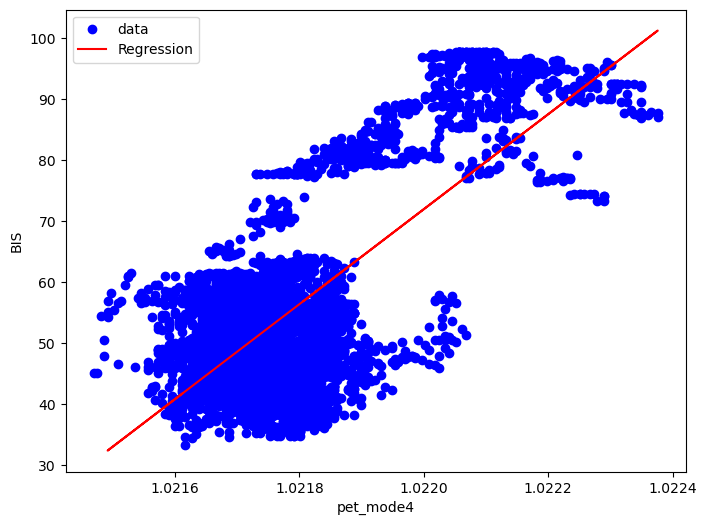

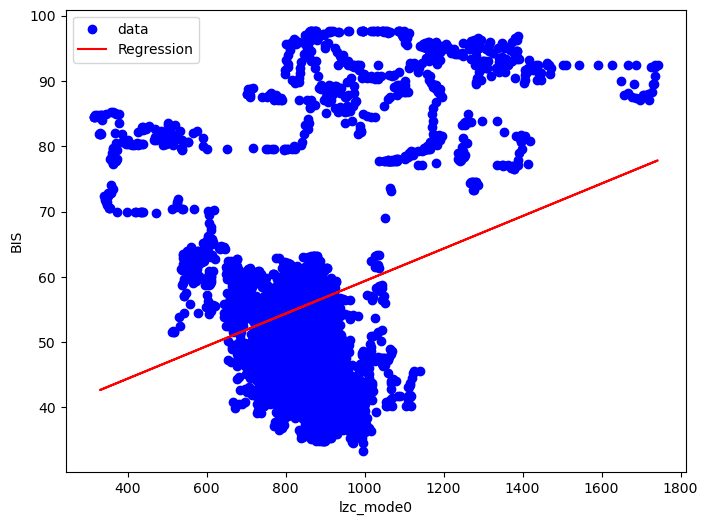

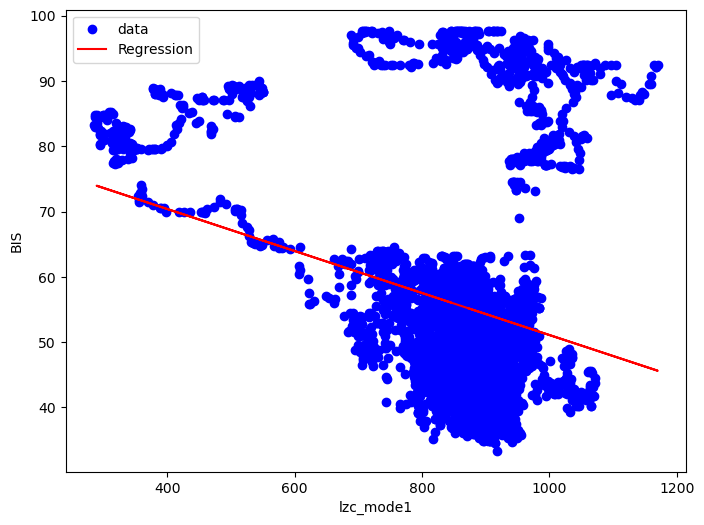

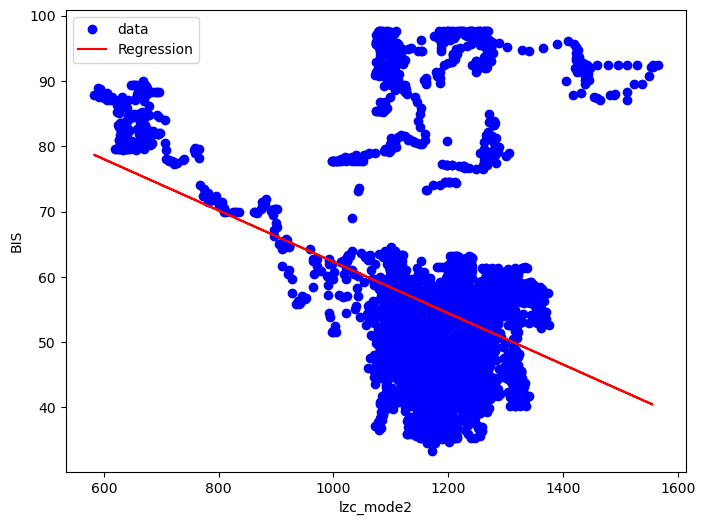

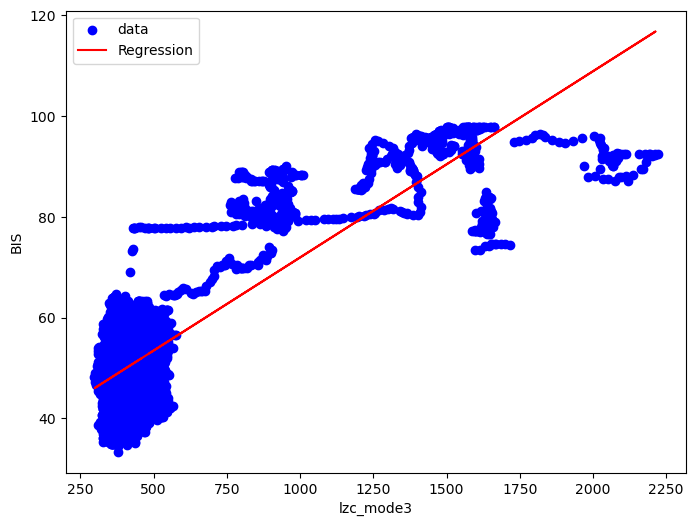

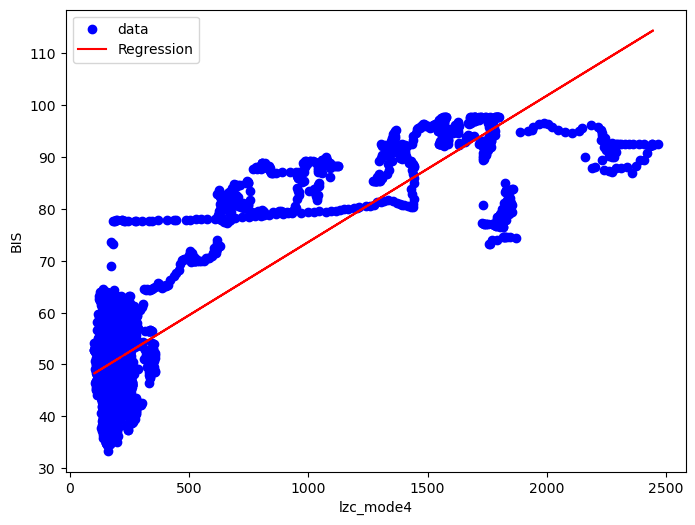

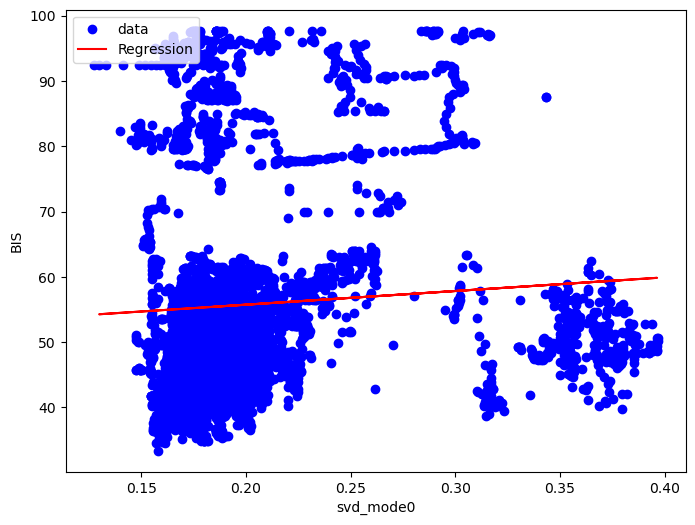

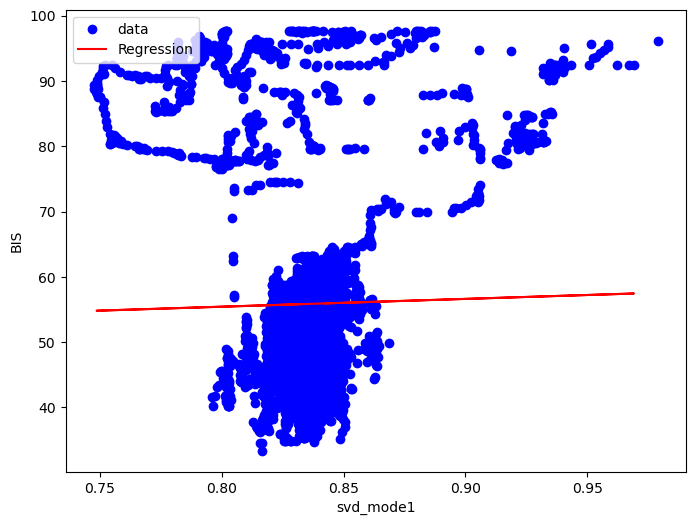

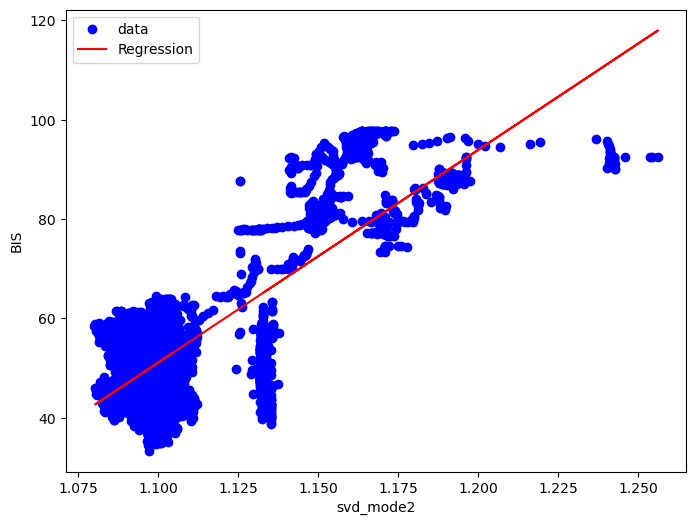

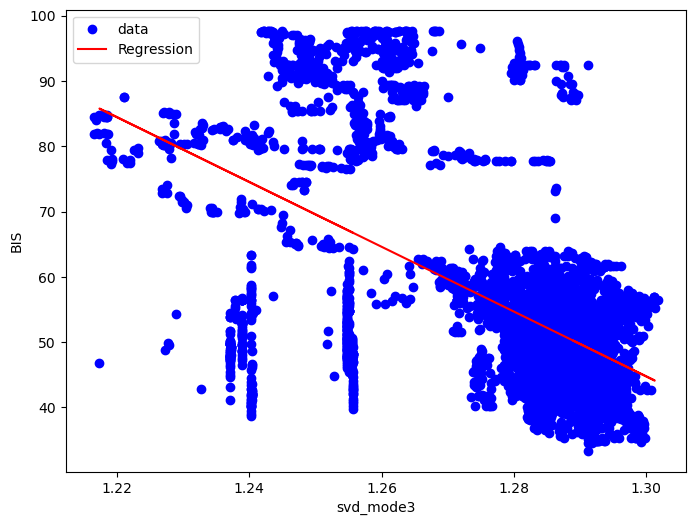

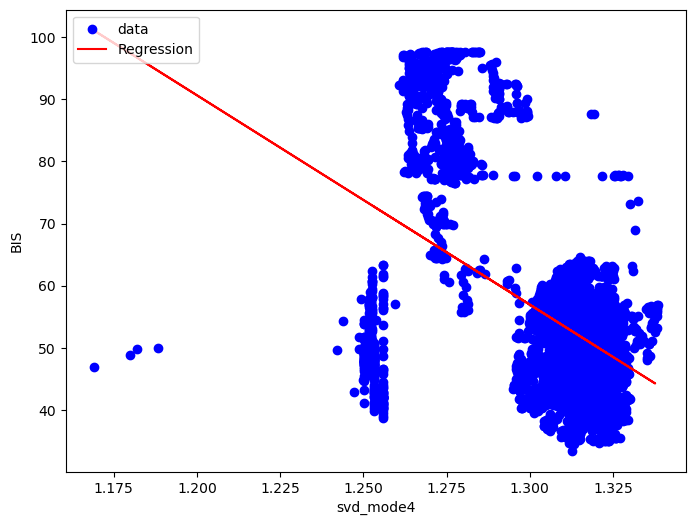

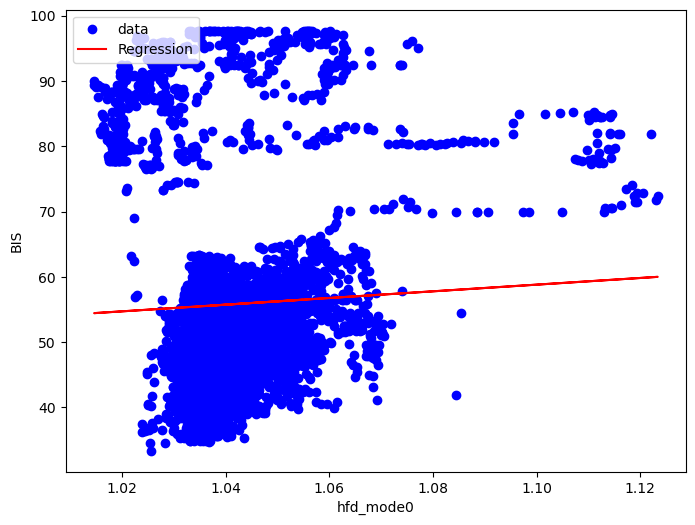

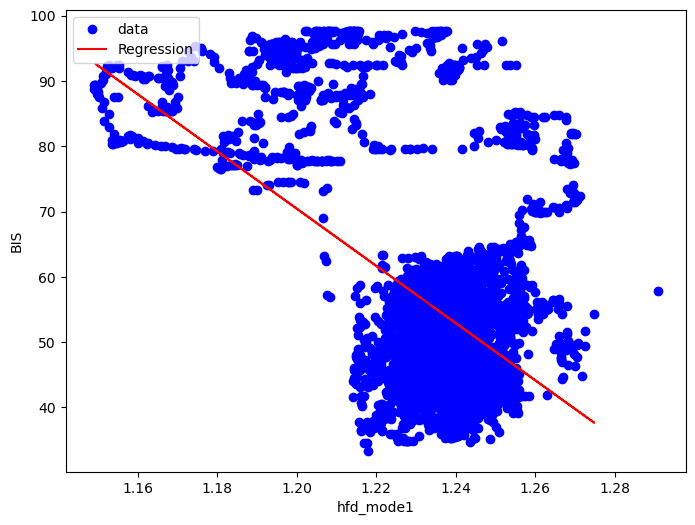

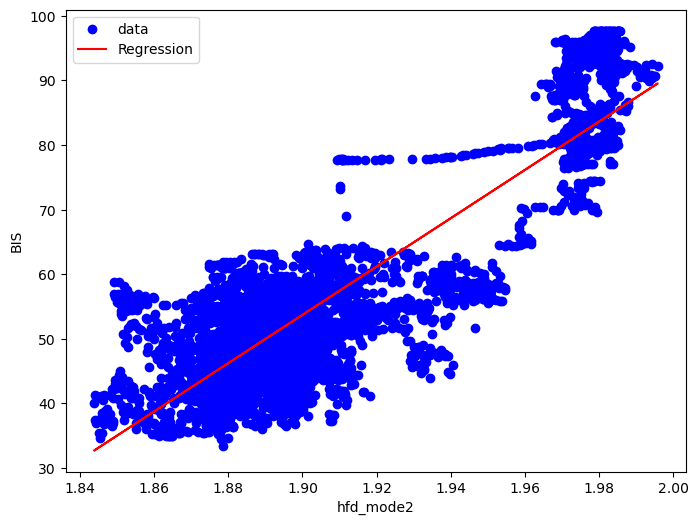

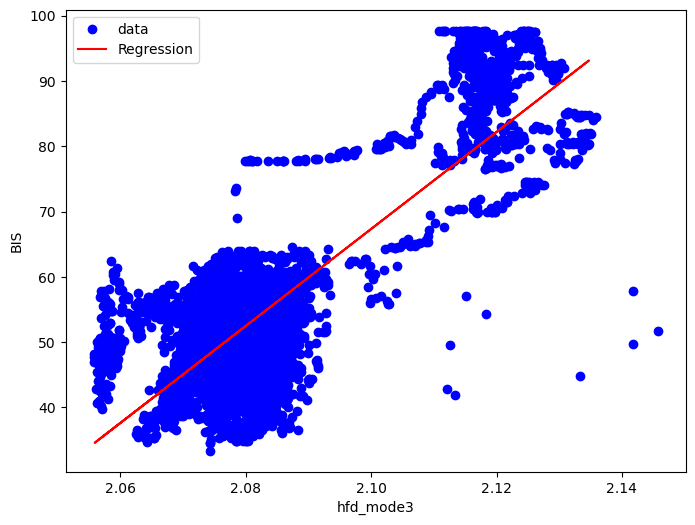

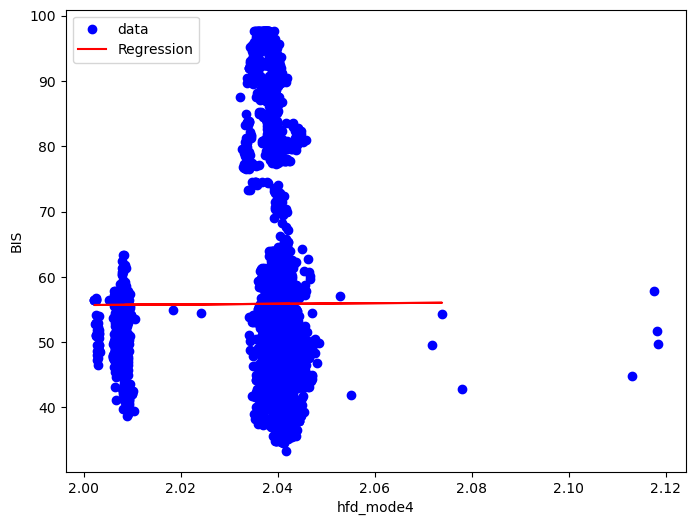

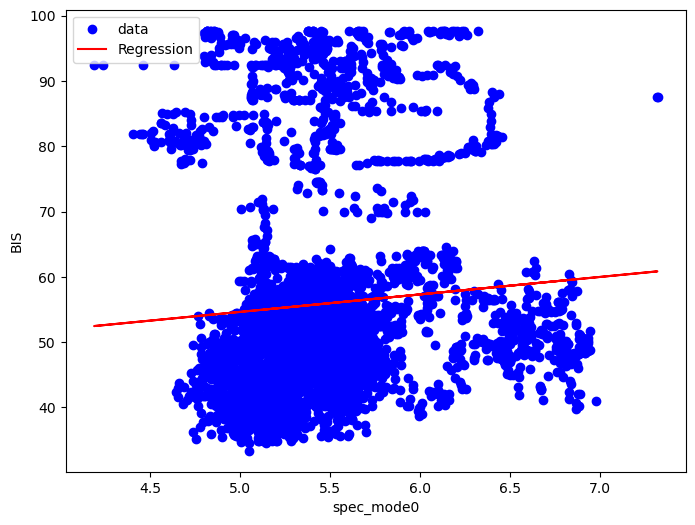

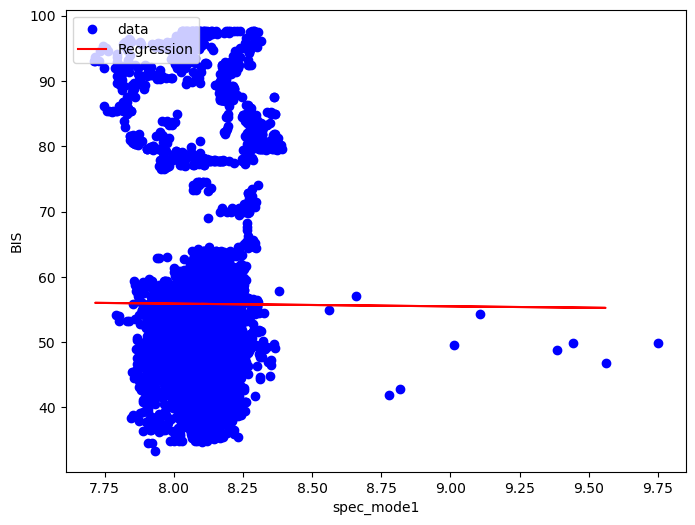

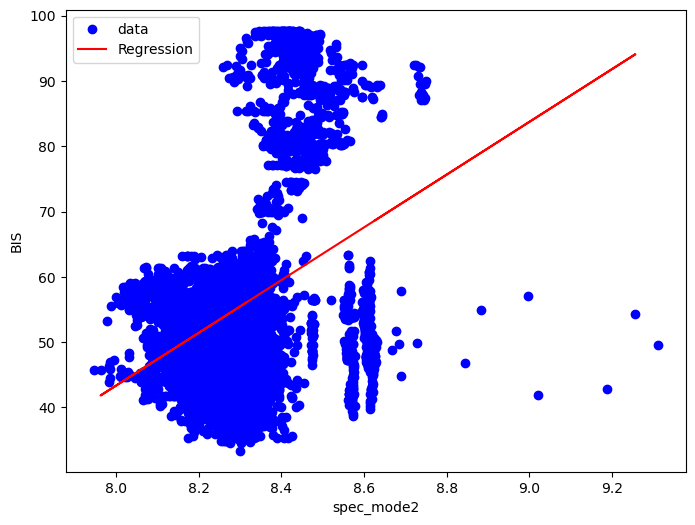

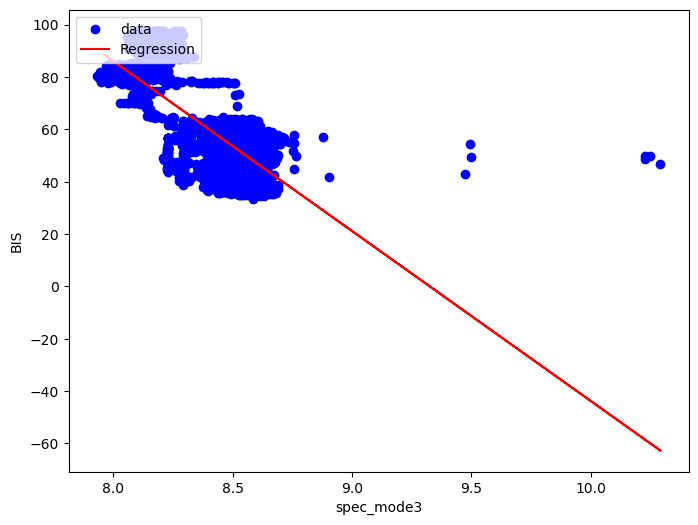

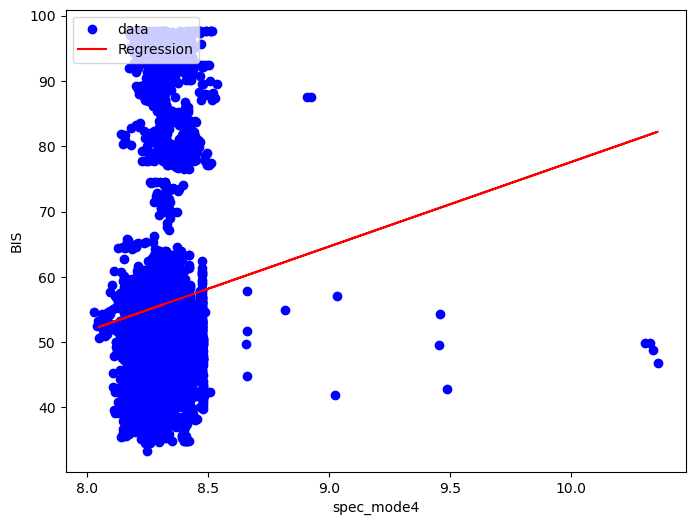

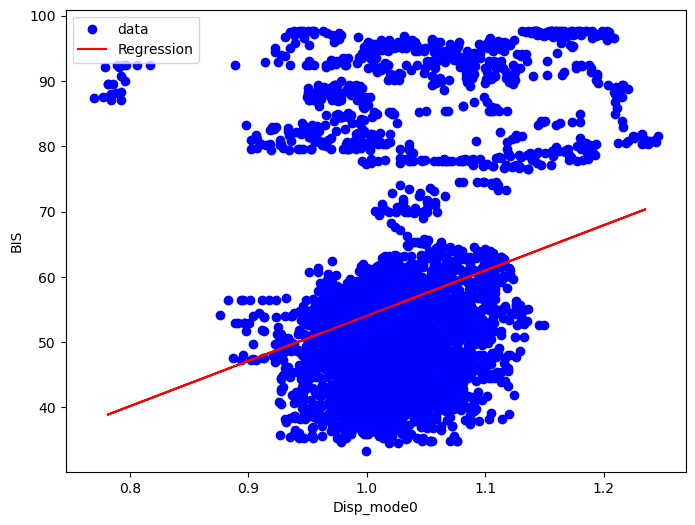

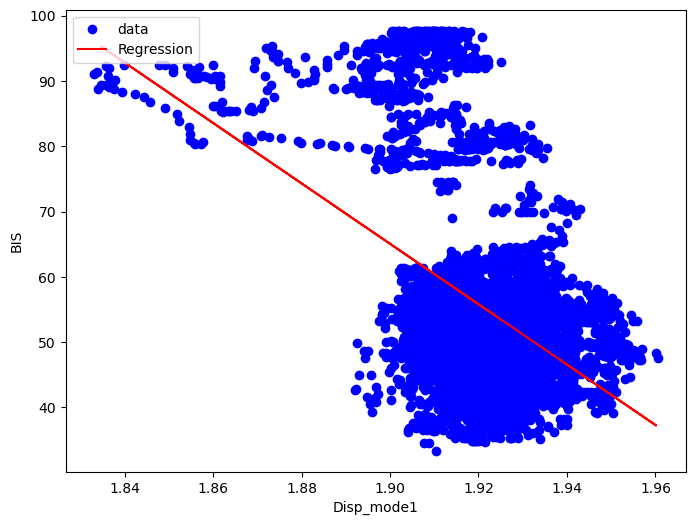

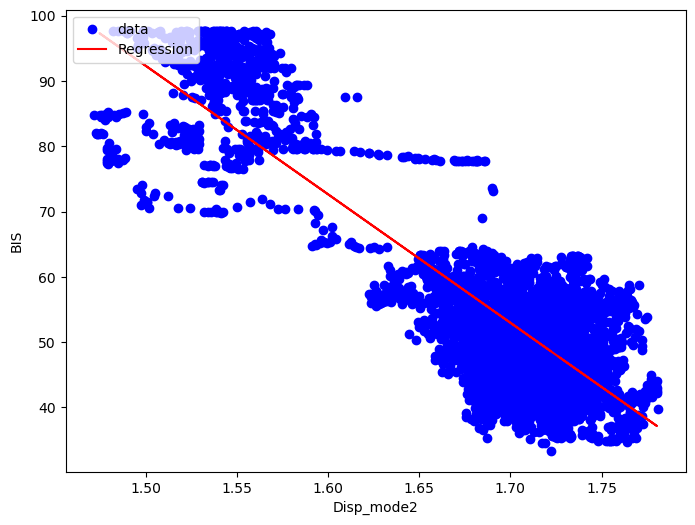

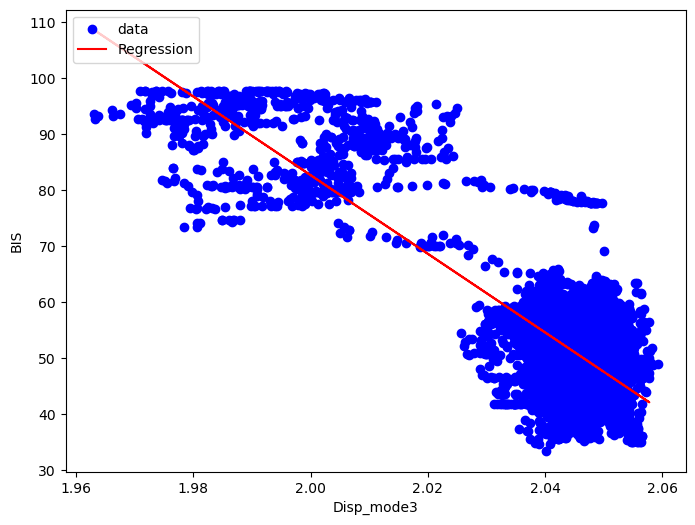

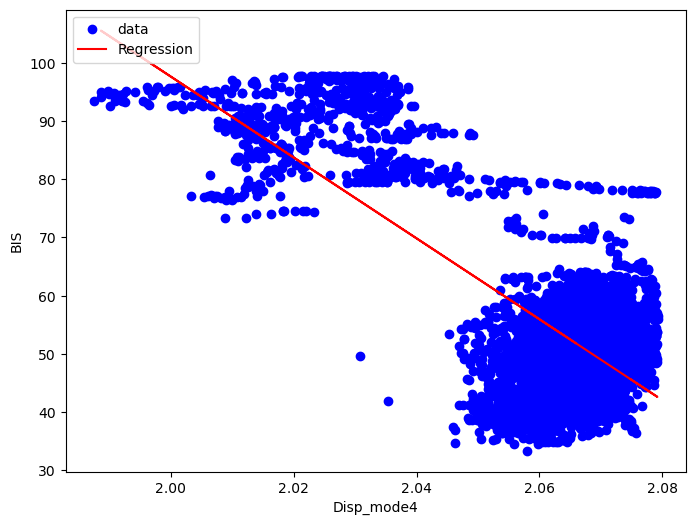

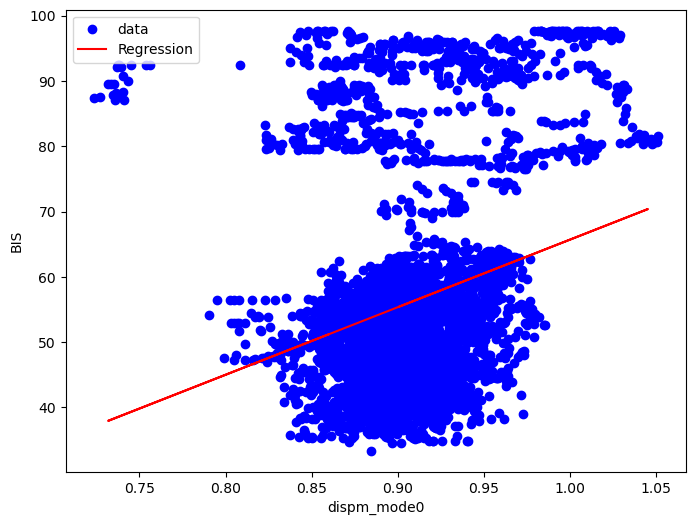

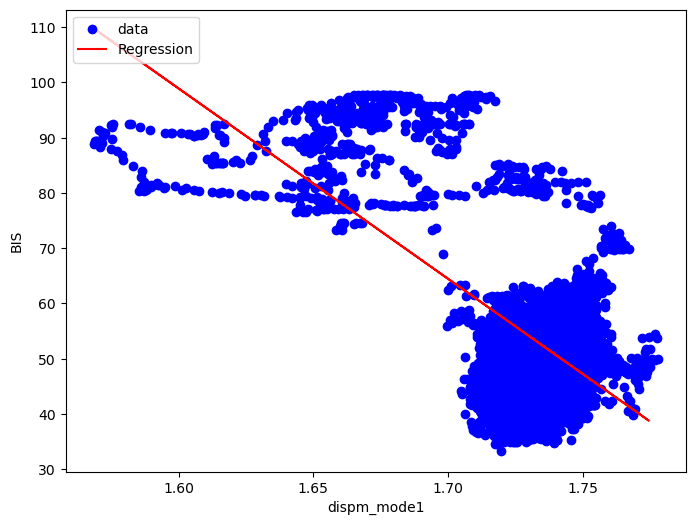

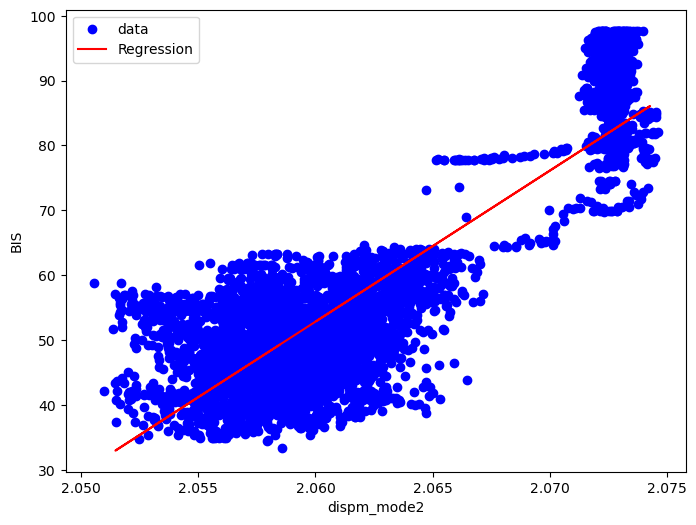

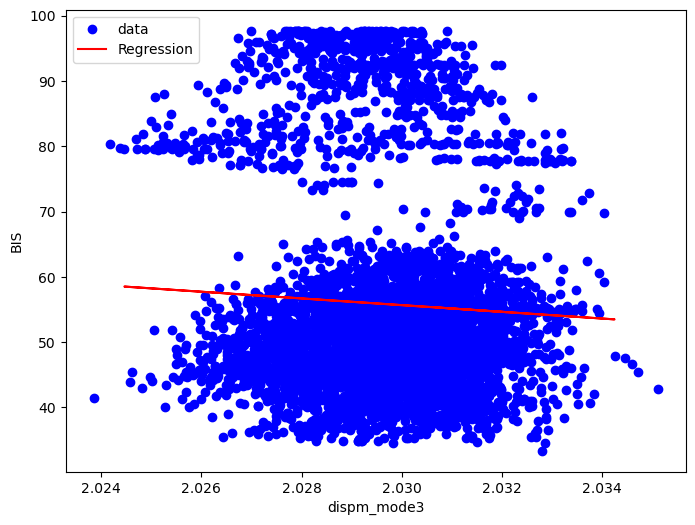

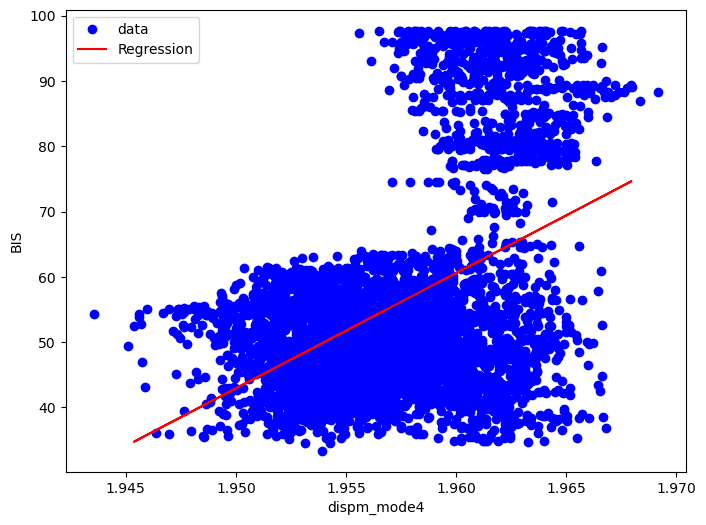

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
27,pet_mode2_r2,77.845241
22,Perment_mode2_r2,77.734563
52,Disp_mode2_r2,76.820904
42,hfd_mode2_r2,76.772832
34,lzc_mode4_r2,75.684142
33,lzc_mode3_r2,75.634338
57,dispm_mode2_r2,74.356198
53,Disp_mode3_r2,72.893306
43,hfd_mode3_r2,69.580000
28,pet_mode3_r2,69.393800


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
34      lzc_mode4    0.446986
22  Perment_mode2    0.328273
27      pet_mode2    0.032972
42      hfd_mode2    0.030593
24  Perment_mode4    0.024043
30      lzc_mode0    0.012411
57    dispm_mode2    0.007100
20  Perment_mode0    0.005358
44      hfd_mode4    0.005325
7        hc_mode2    0.004803
33      lzc_mode3    0.004787
6        hc_mode1    0.004285
40      hfd_mode0    0.004072
49     spec_mode4    0.003663
36      svd_mode1    0.003610
15     detf_mode0    0.003591
43      hfd_mode3    0.003531
45     spec_mode0    0.003525
3        hm_mode3    0.003328
4        hm_mode4    0.003246
2        hm_mode2    0.003197
54     Disp_mode4    0.002978
38      svd_mode3    0.002901
56    dispm_mode1    0.002884
31      lzc_mode1    0.002873
39      svd_mode4    0.002476
5        hc_mode0    0.002420
37      svd_mode2    0.002313
53     Disp_mode3    0.002313
29      pet_mode4    0.002239
35      svd_mode0    0.001920
21  Perment_mode1    0.001901
32      lz